Initialized quadratic game with f(x,y) = x²y

Function f(x,y) = x²y
Testing at point x = 2.0, y = 1.0
Alpha = 0.5, Eta = 0.1

Gradients:
∇x f = 4.0
∇y f = 4.0
∇xy f = 4.0
f(x, y) = 4.0

Test at x = 2.0, y = 1.0:
Implementation 1 (M^(-1)F): dx = -0.24000000000000005, dy = -0.08000000000000002
Implementation 2 (sign(M^(-1))sign(F)): dx = -0.2, dy = 0.0
Implementation 3 (sign(M^(-1)F)): dx = -0.1, dy = -0.1
Implementation 4 (M^(-1)sign(F)): dx = -0.06000000000000001, dy = -0.020000000000000004
Implementation 5 (Sign AGDA): dx = -0.1, dy = 0.1

Generating (x,y) iterate plots for positive starting point...

Generating (x,y) iterate plots for negative_x starting point...

Generating (x,y) iterate plots for negative_y starting point...

Generating (x,y) iterate plots for negative_both starting point...

Generating (x,y) iterate plots for small_positive starting point...

Generating (x,y) iterate plots with alpha=0.1...

Generating (x,y) iterate plots with alpha=0.5...

Generating (x,y) iterat

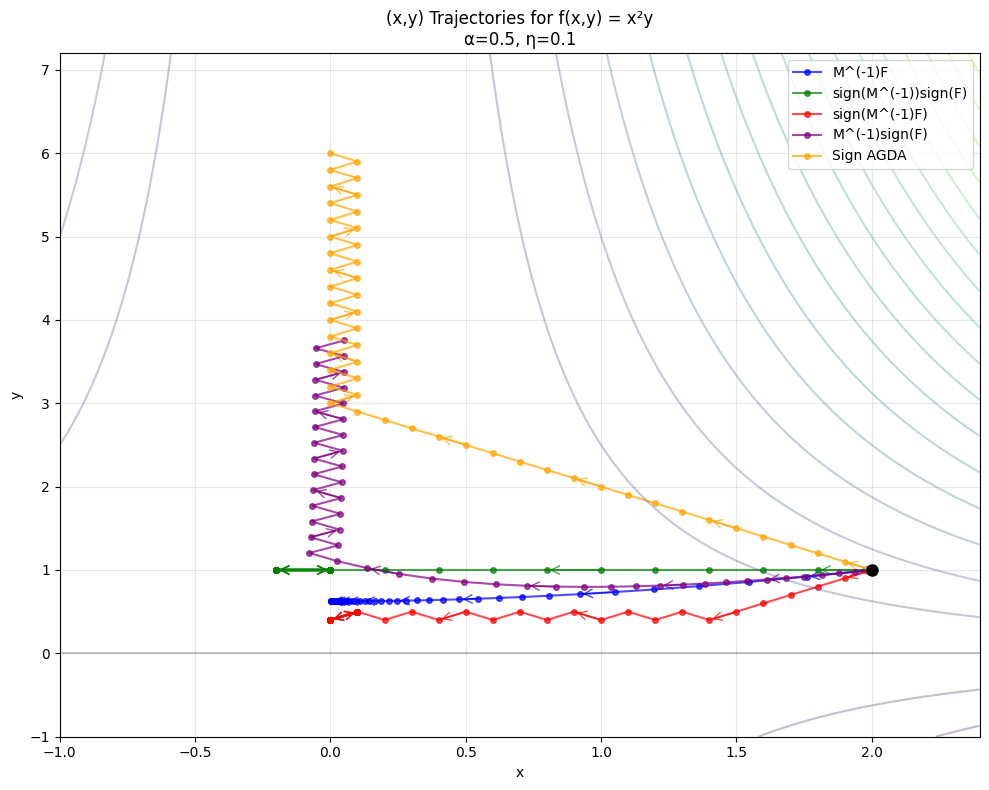

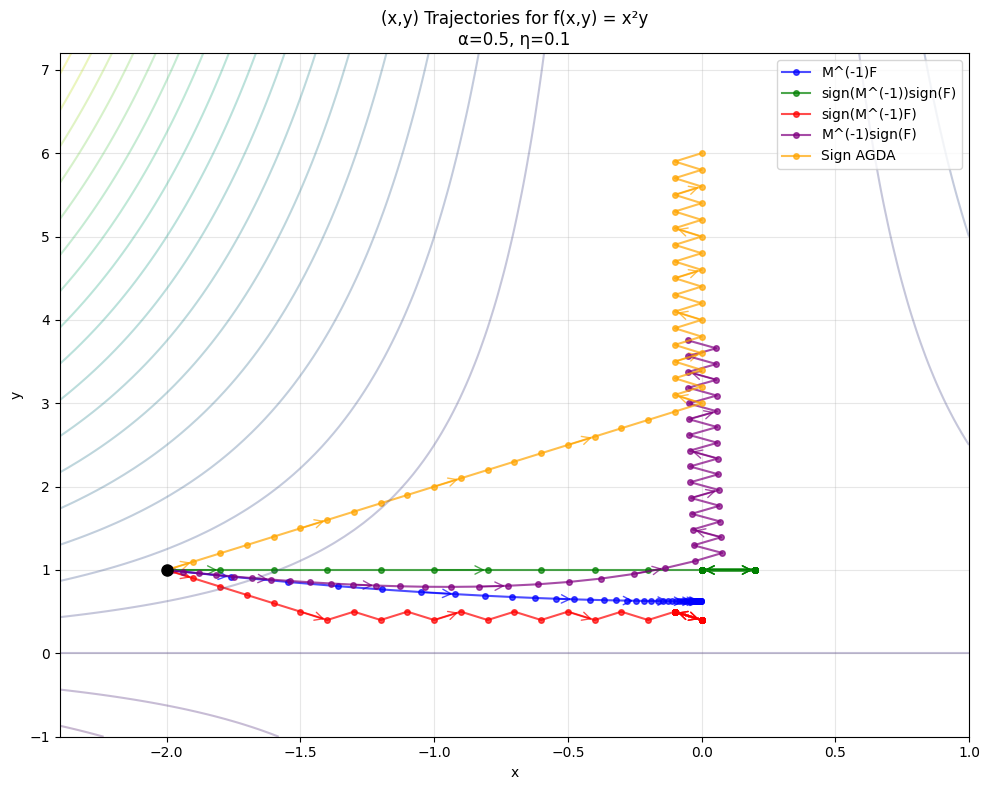

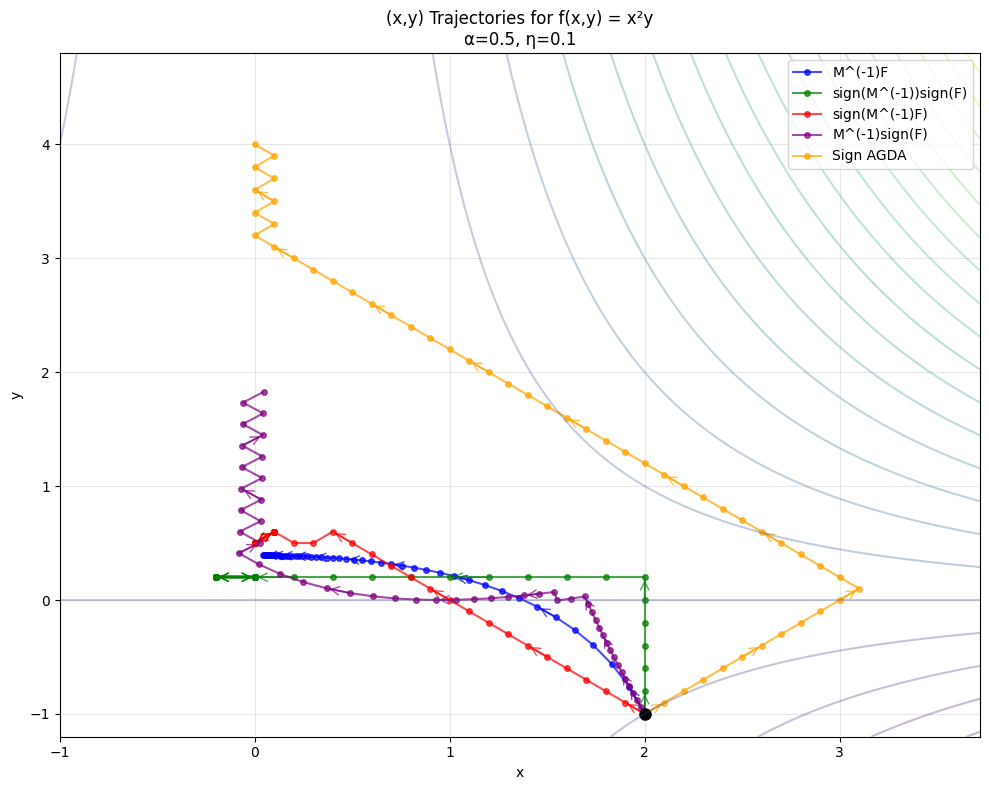

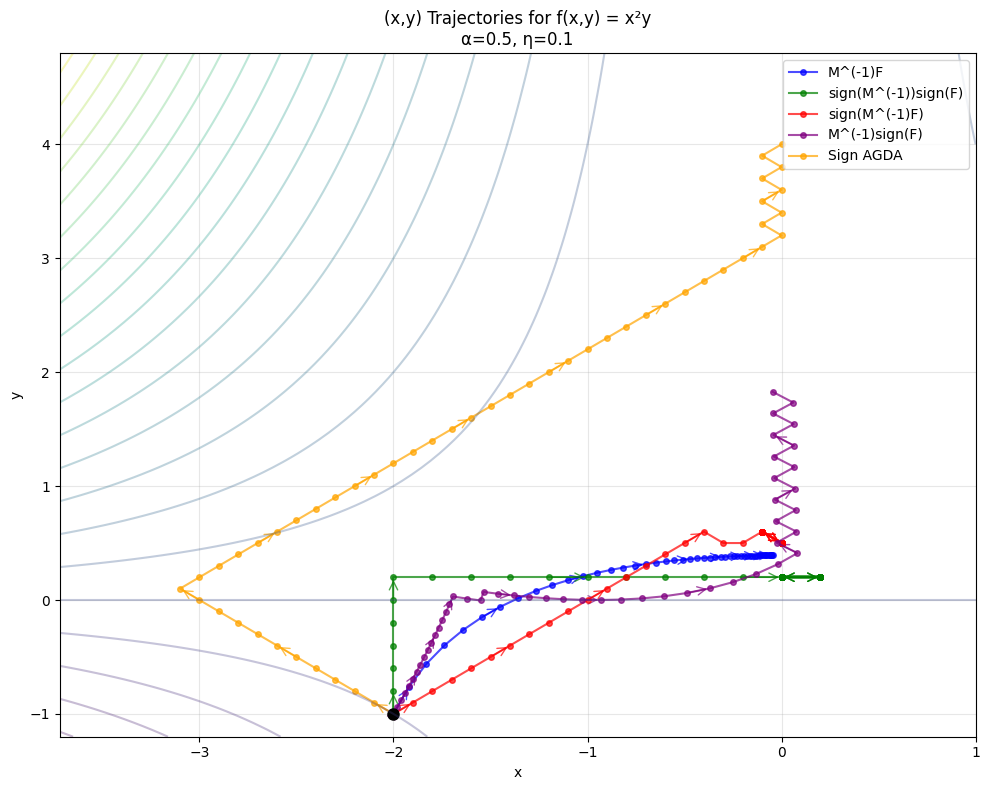

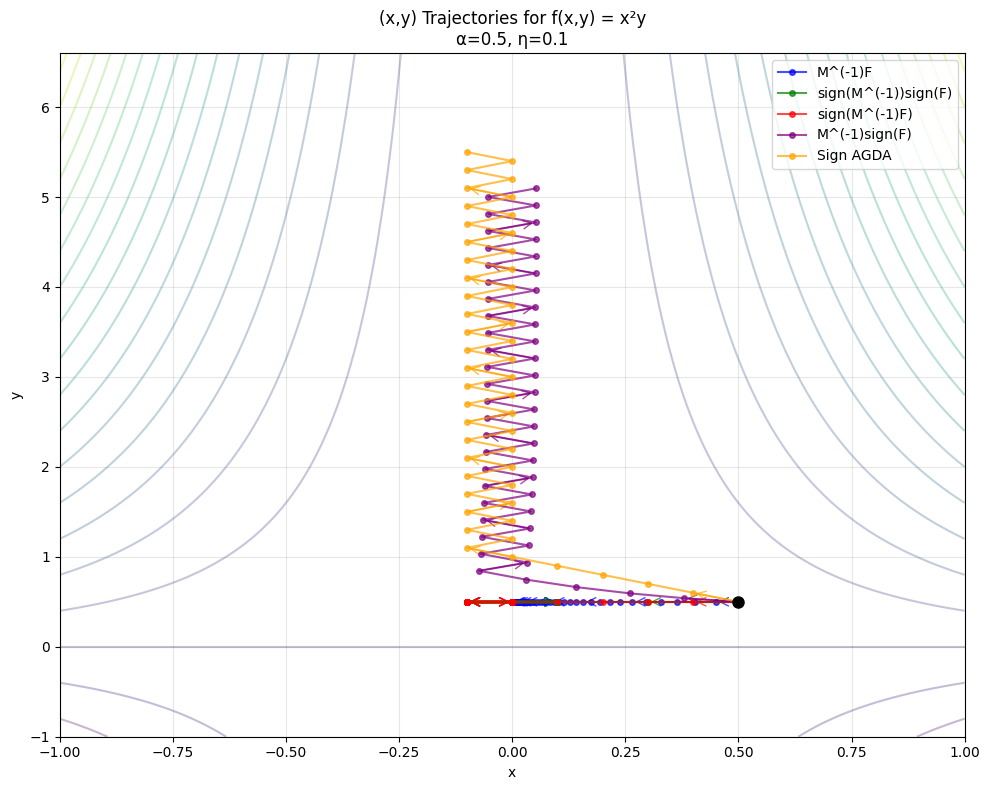

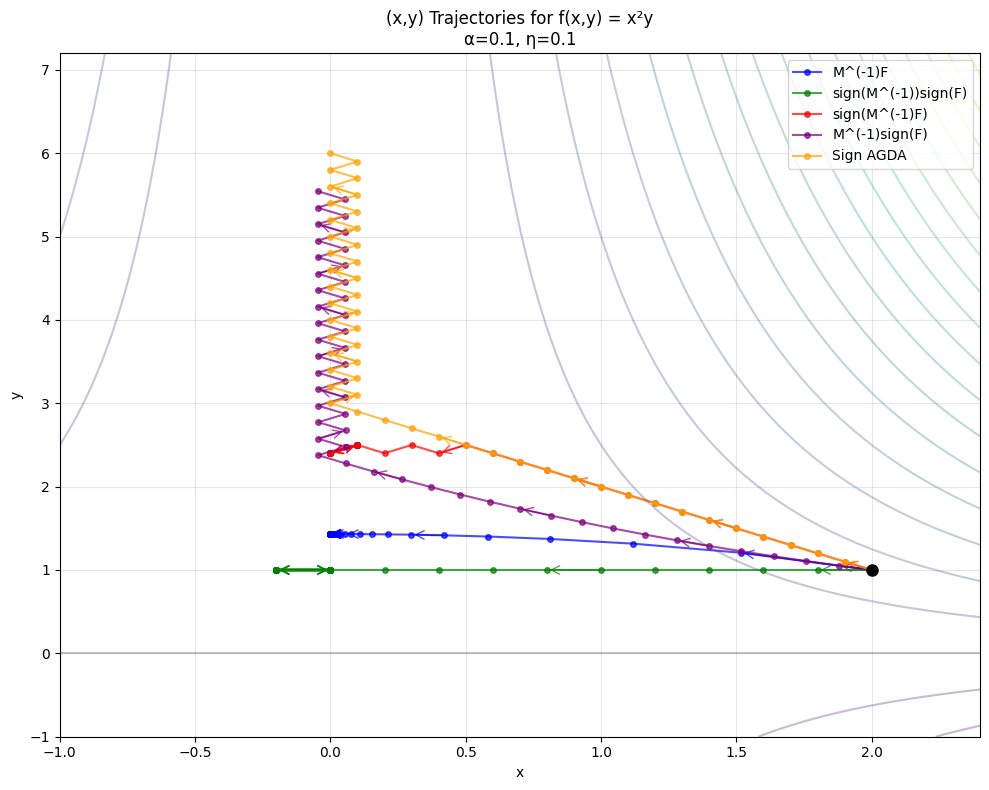

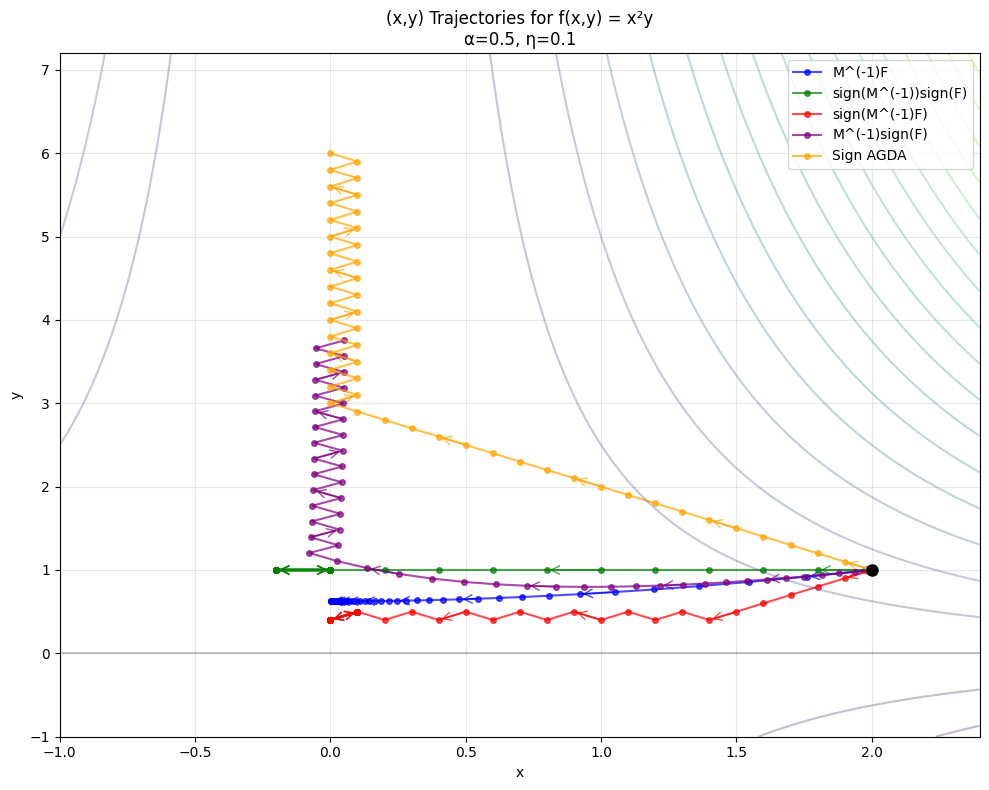

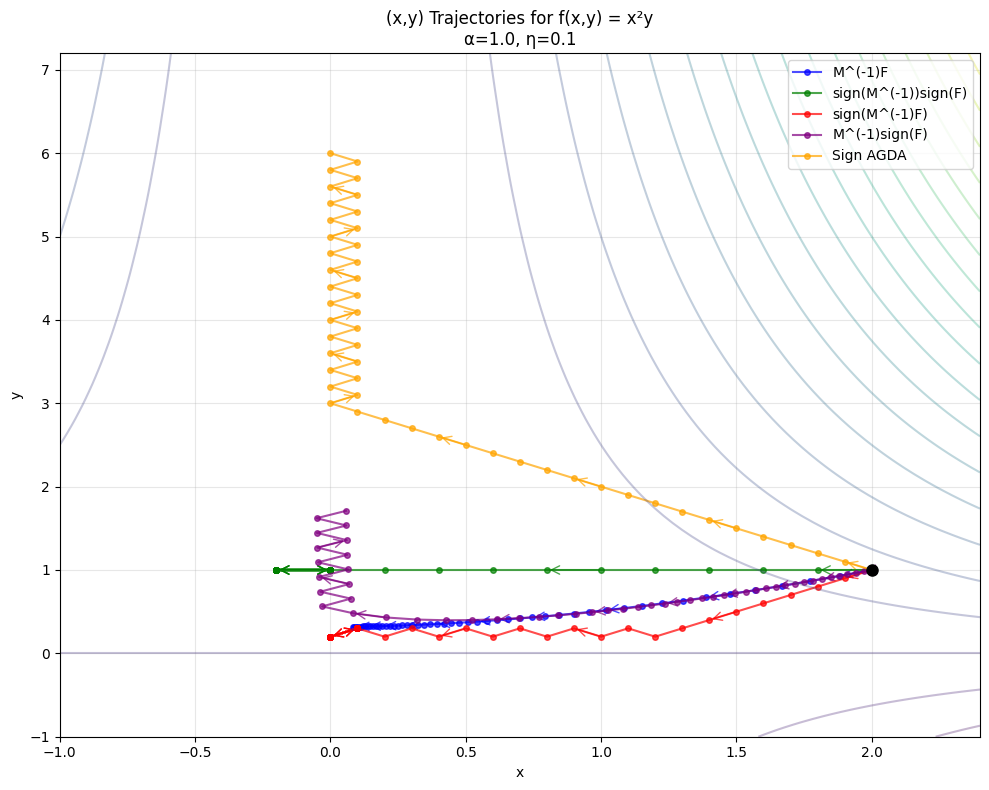

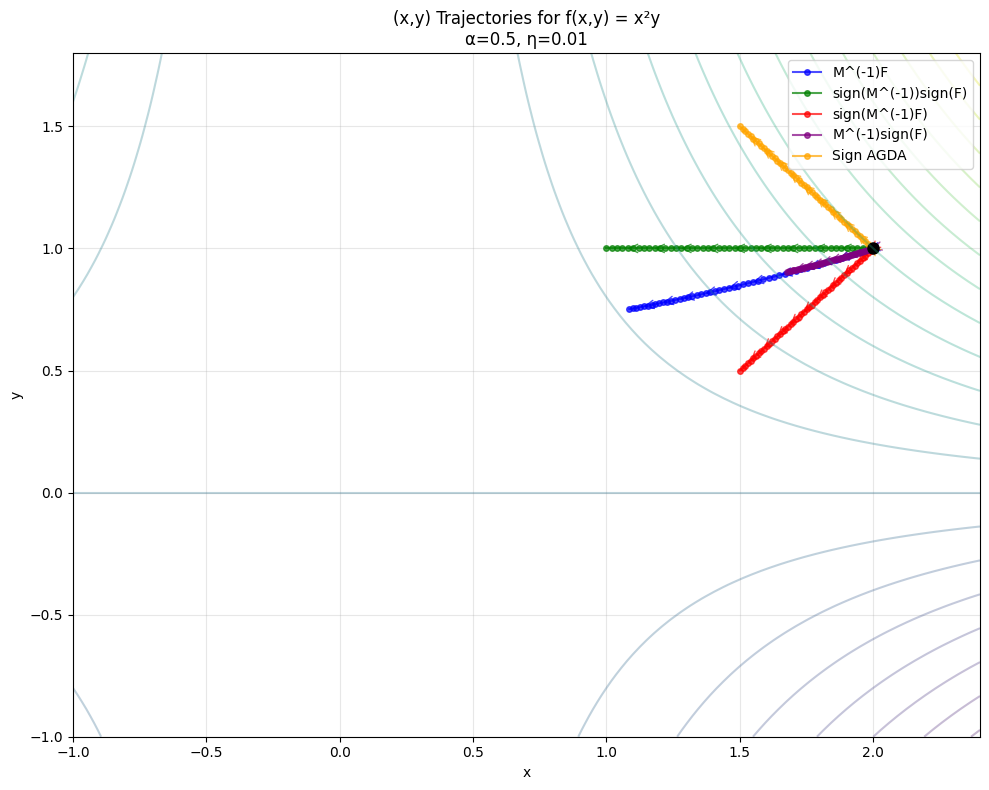

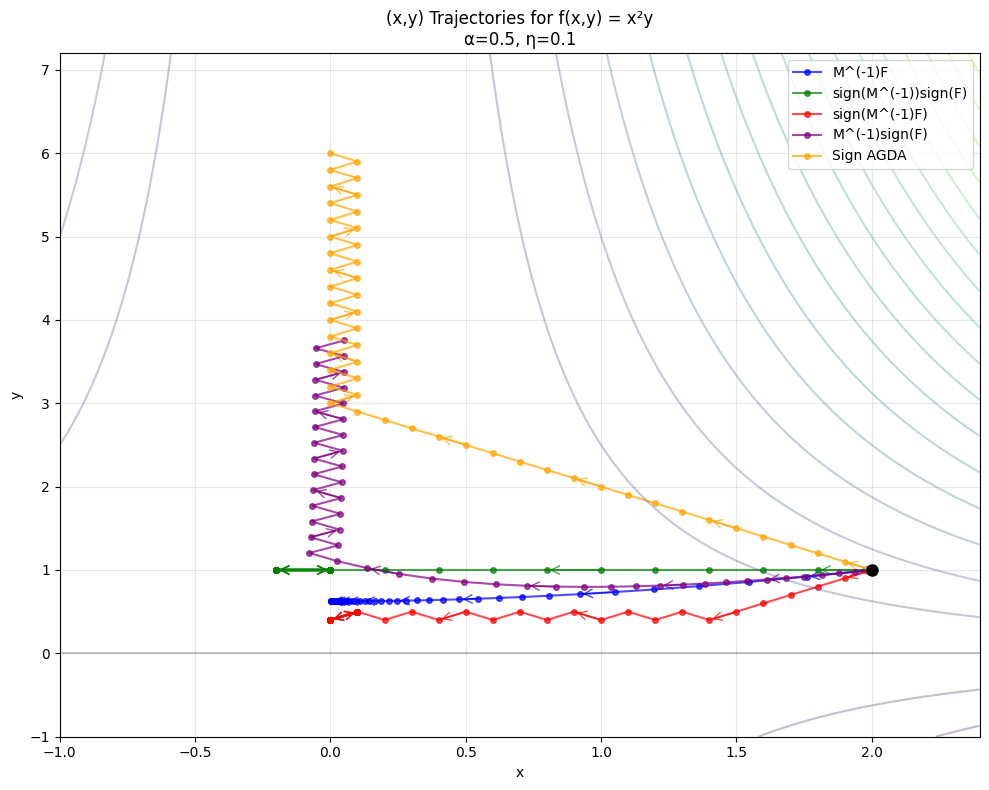

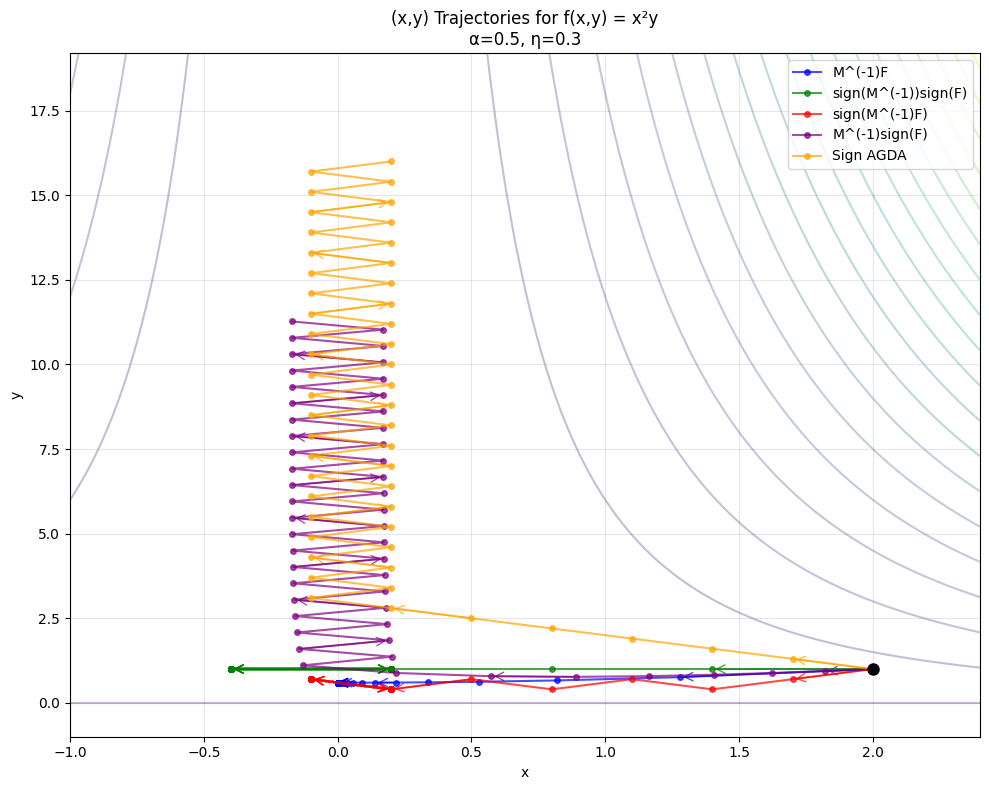

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

class QuadraticGame:
    """
    Class to handle the quadratic game with f(x,y) = x²y
    where x and y are scalars
    """
    def __init__(self):
        """Initialize the quadratic game"""
        print("Initialized quadratic game with f(x,y) = x²y")
    
    def f(self, x, y):
        """Compute the function f(x,y) = x²y"""
        return x**2 * y
    
    def grad_x(self, x, y):
        """Compute gradient with respect to x: ∇_x f(x,y) = 2xy"""
        return 2 * x * y
    
    def grad_y(self, x, y):
        """Compute gradient with respect to y: ∇_y f(x,y) = x²"""
        return x**2
    
    def grad_xy(self, x, y):
        """Compute second derivative ∂²f/∂x∂y = 2x"""
        return 2 * x
    
    def grad_yx(self, x, y):
        """Compute second derivative ∂²f/∂y∂x = 2x"""
        return 2 * x
    
    def update_rule(self, x, y, alpha=0.5, eta=0.1):
        """
        Compute the update using the general rule
        
        Parameters:
        -----------
        x, y : float
            Current position
        alpha : float
            Rotation parameter
        eta : float
            Learning rate
            
        Returns:
        --------
        dict with update information
        """
        # Construct M matrix (2x2 matrix)
        # [1, alpha * dxy]
        # [-alpha * dyx, 1]
        M = np.array([
            [1, alpha * self.grad_xy(x, y)],
            [-alpha * self.grad_yx(x, y), 1]
        ])
        
        # Compute M^(-1)
        M_inv = np.linalg.inv(M)
        
        # Compute gradients
        grad_x_val = self.grad_x(x, y)
        grad_y_val = self.grad_y(x, y)
        
        # Construct the gradient vector F
        F = np.array([grad_x_val, -grad_y_val])
        
        # Compute the update: -η * M^(-1) * F
        update_xy = -eta * M_inv @ F
        
        # Extract updates for x and y
        update_x = update_xy[0]
        update_y = update_xy[1]
        
        return {
            'M': M,
            'M_inv': M_inv,
            'F': F,
            'update_x': update_x,
            'update_y': update_y,
            'update_xy': update_xy
        }
    
    def implementation1(self, x, y, alpha=0.5, eta=0.1):
        """
        Implementation 1: M^(-1)F directly
        """
        result = self.update_rule(x, y, alpha, eta)
        return result['update_x'], result['update_y']
    
    def implementation2(self, x, y, alpha=0.5, eta=0.1):
        """
        Implementation 2: sign(M^(-1)) * sign(F)
        """
        result = self.update_rule(x, y, alpha, eta)
        
        # Extract M^(-1) and F
        M_inv = result['M_inv']
        F = result['F']
        
        # Compute sign(M^(-1))
        sign_M_inv = np.sign(M_inv)
        
        # Compute sign(F)
        sign_F = np.sign(F)
        
        # Compute sign(M^(-1)) * sign(F)
        update_xy = -eta * sign_M_inv @ sign_F
        
        # Extract updates for x and y
        update_x = update_xy[0]
        update_y = update_xy[1]
        
        return update_x, update_y
    
    def implementation3(self, x, y, alpha=0.5, eta=0.1):
        """
        Implementation 3: sign(M^(-1) * F)
        """
        result = self.update_rule(x, y, alpha, eta)
        
        # Compute M^(-1) * F without the -η factor
        M_inv_F = result['M_inv'] @ result['F']
        
        # Compute sign(M^(-1) * F)
        sign_M_inv_F = np.sign(M_inv_F)
        
        # Apply -η
        update_xy = -eta * sign_M_inv_F
        
        # Extract updates for x and y
        update_x = update_xy[0]
        update_y = update_xy[1]
        
        return update_x, update_y
    
    def implementation4(self, x, y, alpha=0.5, eta=0.1):
        """
        Implementation 4: M^(-1) * sign(F)
        """
        result = self.update_rule(x, y, alpha, eta)
        
        # Extract M^(-1) and F
        M_inv = result['M_inv']
        F = result['F']
        
        # Compute sign(F)
        sign_F = np.sign(F)
        
        # Compute M^(-1) * sign(F)
        update_xy = -eta * M_inv @ sign_F
        
        # Extract updates for x and y
        update_x = update_xy[0]
        update_y = update_xy[1]
        
        return update_x, update_y
    
    def implementation5(self, x, y, alpha=0.5, eta=0.1):
        """
        Implementation 5: Sign AGDA (Alternating Gradient Descent Ascent)
        x_{t+1} = x_t - η * sign(∇_x f(x_t, y_t))
        y_{t+1} = y_t - η * sign(∇_y f(x_{t+1}, y_t))
        """
        # First compute the x update using current (x, y)
        grad_x_val = self.grad_x(x, y)
        delta_x = -eta * np.sign(grad_x_val)
        
        # Then compute the y update using updated x but original y
        x_new = x + delta_x
        grad_y_val = self.grad_y(x_new, y)
        delta_y = -eta * np.sign(-grad_y_val)
        
        return delta_x, delta_y
    
    def run_test(self, x, y, alpha=0.5, eta=0.1, verbose=True):
        """
        Test all implementations at a given point
        
        Parameters:
        -----------
        x, y : float
            Test position
        alpha, eta : float
            Parameters for the update rule
        verbose : bool
            Whether to print detailed output
            
        Returns:
        --------
        List of (update_x, update_y) for each implementation
        """
        if verbose:
            print(f"\nFunction f(x,y) = x²y")
            print(f"Testing at point x = {x}, y = {y}")
            print(f"Alpha = {alpha}, Eta = {eta}")
            print("\nGradients:")
            print(f"∇x f = {self.grad_x(x, y)}")
            print(f"∇y f = {self.grad_y(x, y)}")
            print(f"∇xy f = {self.grad_xy(x, y)}")
            print(f"f(x, y) = {self.f(x, y)}")
        
        # Call each implementation
        impl1 = self.implementation1(x, y, alpha, eta)
        impl2 = self.implementation2(x, y, alpha, eta)
        impl3 = self.implementation3(x, y, alpha, eta)
        impl4 = self.implementation4(x, y, alpha, eta)
        impl5 = self.implementation5(x, y, alpha, eta)
        
        # Print results
        print(f"\nTest at x = {x}, y = {y}:")
        print(f"Implementation 1 (M^(-1)F): dx = {impl1[0]}, dy = {impl1[1]}")
        print(f"Implementation 2 (sign(M^(-1))sign(F)): dx = {impl2[0]}, dy = {impl2[1]}")
        print(f"Implementation 3 (sign(M^(-1)F)): dx = {impl3[0]}, dy = {impl3[1]}")
        print(f"Implementation 4 (M^(-1)sign(F)): dx = {impl4[0]}, dy = {impl4[1]}")
        print(f"Implementation 5 (Sign AGDA): dx = {impl5[0]}, dy = {impl5[1]}")
        
        return [impl1, impl2, impl3, impl4, impl5]
    
    def plot_2d_iterates(self, start_x, start_y, alpha=0.5, eta=0.1, num_iterations=50, method_names=None):
        """
        Generate and plot 2D iterates for all implementations
        
        Parameters:
        -----------
        start_x, start_y : float
            Starting position
        alpha, eta : float
            Parameters for the update rule
        num_iterations : int
            Number of iterations to run
        method_names : list of str or None
            Names for the methods in the legend
            
        Returns:
        --------
        matplotlib figure
        """
        if method_names is None:
            method_names = ['M^(-1)F', 'sign(M^(-1))sign(F)', 'sign(M^(-1)F)', 
                           'M^(-1)sign(F)', 'Sign AGDA']
        
        # Implementation functions
        implementations = [
            self.implementation1, 
            self.implementation2, 
            self.implementation3,
            self.implementation4,
            self.implementation5
        ]
        
        # Colors for each implementation
        colors = ['blue', 'green', 'red', 'purple', 'orange']
        
        # Create figure and axis for phase space
        fig, ax = plt.subplots(figsize=(10, 8))
        
        # For each implementation
        for i, implementation in enumerate(implementations):
            # Initialize trajectory storage
            x, y = start_x, start_y
            
            # Lists to store trajectory points
            x_trajectory = [x]
            y_trajectory = [y]
            
            # Run iterations
            for _ in range(num_iterations):
                # Get update
                delta_x, delta_y = implementation(x, y, alpha, eta)
                
                # Update position
                x += delta_x
                y += delta_y
                
                # Store current position
                x_trajectory.append(x)
                y_trajectory.append(y)
            
            # Plot phase space trajectory (x vs y)
            ax.plot(x_trajectory, y_trajectory, '-o', color=colors[i], 
                   label=method_names[i], markersize=4, linewidth=1.5, alpha=0.7)
            
            # Add arrows to indicate direction on phase plot
            for j in range(0, len(x_trajectory)-1, max(1, num_iterations//10)):
                ax.add_patch(FancyArrowPatch(
                    (x_trajectory[j], y_trajectory[j]),
                    (x_trajectory[j+1], y_trajectory[j+1]),
                    arrowstyle='->', color=colors[i], alpha=0.7,
                    mutation_scale=15
                ))
        
        # Set axis labels and title for phase space plot
        ax.set_title(f'(x,y) Trajectories for f(x,y) = x²y\nα={alpha}, η={eta}')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.grid(True, alpha=0.3)
        ax.legend()
        
        # Show starting point
        ax.plot(start_x, start_y, 'ko', markersize=8, label='Start')
        
        # Add contour lines to phase plot for better visualization
        x_min = min(min(x_trajectory) * 1.2, start_x * 1.2, -1)
        x_max = max(max(x_trajectory) * 1.2, start_x * 1.2, 1)
        y_min = min(min(y_trajectory) * 1.2, start_y * 1.2, -1)
        y_max = max(max(y_trajectory) * 1.2, start_y * 1.2, 1)
        
        x_range = np.linspace(x_min, x_max, 100)
        y_range = np.linspace(y_min, y_max, 100)
        X, Y = np.meshgrid(x_range, y_range)
        Z = np.zeros_like(X)
        
        for i in range(len(x_range)):
            for j in range(len(y_range)):
                Z[j, i] = self.f(X[j, i], Y[j, i])
        
        ax.contour(X, Y, Z, 20, cmap='viridis', alpha=0.3)
        
        plt.tight_layout()
        return fig

def run_quadratic_examples():
    """Run examples for the quadratic function f(x,y) = x²y"""
    # Initialize the game
    game = QuadraticGame()
    
    # Test at different starting points
    test_points = [
        (2.0, 1.0, "positive"),
        (-2.0, 1.0, "negative_x"),
        (2.0, -1.0, "negative_y"),
        (-2.0, -1.0, "negative_both"),
        (0.5, 0.5, "small_positive")
    ]
    
    # Just run one quick test to see the update directions
    game.run_test(2.0, 1.0)
    
    # Plot 2D iterates for all starting points
    for x, y, label in test_points:
        print(f"\nGenerating (x,y) iterate plots for {label} starting point...")
        fig = game.plot_2d_iterates(x, y)
        plt.savefig(f"quadratic_xy_iterates_{label}.png", dpi=300, bbox_inches='tight')
    
    # Different alpha values at the same starting point
    alpha_values = [0.1, 0.5, 1.0]
    for alpha in alpha_values:
        print(f"\nGenerating (x,y) iterate plots with alpha={alpha}...")
        fig = game.plot_2d_iterates(2.0, 1.0, alpha=alpha)
        plt.savefig(f"quadratic_xy_iterates_alpha_{alpha}.png", dpi=300, bbox_inches='tight')
    
    # Different eta values at the same starting point
    eta_values = [0.01, 0.1, 0.3]
    for eta in eta_values:
        print(f"\nGenerating (x,y) iterate plots with eta={eta}...")
        fig = game.plot_2d_iterates(2.0, 1.0, eta=eta)
        plt.savefig(f"quadratic_xy_iterates_eta_{eta}.png", dpi=300, bbox_inches='tight')
    
    print("\nAll examples completed and plots saved.")
    
    # Show plots if running interactively
    plt.show()

if __name__ == "__main__":
    run_quadratic_examples()